<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
<table> <tr>

<table width="100%"><td style="background-color:#ffffff;font-size:14px;font-style:italic;text-align:right;">Prepared by <a href="http://cqtech.org" target="_blank"><b>CQTech</b></a>.</td></table>
    
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# Single Qubit Topological Quantum Gates

<hr>

Fibonacci anyons and their braiding operations are thought to be a universal quantum computer. It means that we can construct any arbitrary single qubit gate, especially, $H$ and $T$ gates in addition to the controlled $CNOT$ gate, using only the braiding operations of Fibonacci anyons.

In the next two notebooks, we will see how to construct universal quantum gates using such Fibonacci anyons.

## Content

1. [Drawing Braiding Sequences (Topological quantum circuits)](#100)
    1. [Visualizing Elementary Braiding Operations](#110)
1. [Single Qubit Braiding Operations](#200)
    1. [Diagrammatic Representation of Braiding Operations](#210)
    1. [Matrix Representation of Braiding Operations](#220)
    1. [Single Qubit Braiding Matrices as Rotations](#230)
1. [Universality of Single Qubit Braiding Operators](#300)
1. [Approximating Single Qubit Quantum Gates with Braiding Operations](#400)
    1. [Properties of Single Qubit Braiding Operations](#410)
        1. [Similarity Relation](#411)
        1. [Yang-Baxter Relation](#412)
        1. [Braiding Operations as Square Roots of Identity](#413)
    1. [Weaves vs Braids](#420)
    1. [Mini-Project](#430)
    1. [Examples](#440)
        1. [Distance](#4411)
        1. [Example: Hadamard Gate](#441)
        1. [Example: T Gate](#442)
1. [More on the Simulator (Optional)](#500)

[References](#bibliography)

<hr>

<a id="100"></a> 
## 1. Drawing Braiding Sequences (Topological quantum circuits)

A topological quantum circuit is determined by the number of anyons $N$ and the sequence of braiding operations (an ordered list of braiding operations). Each braiding operator $\sigma_i^p$ that braids between the $i$'th anyon and the $(i+1)$'th anyon is defined by the *index* $i$ and the *direction of braiding* $p=1$ if clockwise and $p= -1$ if counterclockwise.

Let's draw our topological quantum circuits with a pre-designed Simulator.


In [1]:
from tqsim import AnyonicCircuit

A braiding sequence with length $L$ can be written as:

$$ \sigma_{i_L}^{p_L}\cdots \sigma_{i_2}^{p_2} \sigma_{i_1}^{p_1} $$

Notice that braiding operations are applied to the fusion state as a matrix, such that the first operation to be applied is the rightmost operation, which is $\sigma_{i_1}^{p_1}$ in this case. 

If $p>0$, the braiding is in the clockwise direction. If $p<0$, the braiding is in the counterclockwise direction.

We can write this braiding sequence as a list in Python as follows:

$$\texttt{ [[i1, p1], [i2, p2], ..., [iL, pL]]}$$

<a id="110"></a>
### 1.1 Visualizing Elementary Braiding Operations
Let's visualize $\sigma_1$ on 3 anyons.

We know that $\sigma_1$ is the exchange operation of anyon 1 and anyon 2 in clockwise direction.


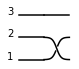

In [2]:
# Create a braiding circuit of 3 anyons
circuit = AnyonicCircuit()  # By default, the circuit will have only 3 anyons.

# Apply sigma_1 by braiding anyon 1 with anyon 2
circuit.braid(1, 2)

# Draw the circuit
circuit.drawer.anyons[1].label = 1
circuit.drawer.anyons[2].label = 2
circuit.drawer.anyons[3].label = 3
circuit.draw()

<div class="alert alert-block alert-warning">
<b>Note:</b> The Time arrow in this drawing is pointing from left to right.
</div>

In [3]:
# Print the braiding sequence symbolically
from IPython.display import Latex
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

To draw the counterclockwise braid such as $\sigma_1^{-1}$, it is sufficient to flip the order of anyon numeral labels.

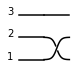

In [4]:
# Draw sigma_1^(-1)
circuit = AnyonicCircuit()
circuit.braid(2, 1)

for i in range(1, 4):
    circuit.drawer.anyons[i].label = i
circuit.draw()

In [5]:
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

<a id="task1"></a>
#### Task 1

Draw the following braiding sequence on 3 anyons:

$$ \sigma_{2}^{-1}\sigma_{2}^{-1} \sigma_{1} \sigma_{1} $$

<div class="alert alert-block alert-danger"> 
<b>Caution:</b> Mind the order of the operators!
</div>


[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task1)

<hr>

<a id="200"></a>
<h2> 2. Single Qubit Braiding Operations </h2>



In Fibonacci model, we can encode a single qubit in 3 anyons. Given three Fibonacci anyons, we have 4 braiding operations : $\sigma_1$ and $\sigma_2$ which braids anyons in clockwise direction, $\sigma_1^{-1}$ and $\sigma_2^{-1}$ which braids anyons in couterclockwise direction.


<a id="210"></a>
### 2.1 Diagrammatic Representation of $\sigma_1$, $\sigma_2$, $\sigma_1^{-1}$ and $\sigma_2^{-1}$

<a id="task2"></a>
#### Task 2

Draw $\sigma_1$, $\sigma_2$, $\sigma_1^{-1}$ and $\sigma_2^{-1}$ applied on 3 anyons.

In [6]:
# Draw sigma_1 operation on 3 anyons

In [7]:
# Draw sigma_1^(-1) operation on 3 anyons

In [8]:
# Draw sigma_2 operation on 3 anyons

In [9]:
# Draw sigma_2^(-1) operation on 3 anyons

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task2)

<a id="220"></a>
### 2.2 Matrix Representation of $\sigma_1$, $\sigma_2$, $\sigma_1^{-1}$ and $\sigma_2^{-1}$

$$\sigma_1 = R = \mymatrix{cc}{e^{-\frac{4i \pi}{5}} & 0 \\ 0 & e^{\frac{3i \pi}{5}}}$$

$$\sigma_2 = B = FRF^\dagger = \mymatrix{cc}{ \frac{1}{\Phi} & \frac{1}{\sqrt{\Phi}} \\ \frac{1}{\sqrt{\Phi}} & -\frac{1}{\Phi} } \mymatrix{cc}{e^{-\frac{4i \pi}{5}} & 0 \\ 0 & e^{\frac{3i \pi}{5}}} \mymatrix{cc}{ \frac{1}{\Phi} & \frac{1}{\sqrt{\Phi}} \\ \frac{1}{\sqrt{\Phi}} & -\frac{1}{\Phi} }$$

such that $\Phi$ is the Golden number which the positive solution of the equation:

$$\Phi^2 - \Phi = 1$$

#### Task 3

Using Numpy, calculate $\sigma_1$, $\sigma_1^{-1}$, $\sigma_2$ and $\sigma_2^{-1}$ explicitly.

In [10]:
import numpy as np

In [ ]:
# Compute sigma_1

### Your Code

# Show sigma_1
print(sigma_1)

**Remark**

Braiding matrices are unitary:
$$\sigma_i^{-1} = \sigma_i^\dagger = \overline{\sigma_i}^T$$

In [ ]:
# Compute sigma_1^(-1)

### Your Code

# show sigma_1^(-1)
print(sigma_1_inv)

In [ ]:
# Compute the golden number

### Your Code

print(PHI)

In [ ]:
# Compute F matrix

### Your Code

print(F)

In [ ]:
# Compute R matrix

### Your Code

print(R)

In [ ]:
# Compute sigma_2

### Your Code

# show sigma_2
print(sigma_2)

In [ ]:
# Compute sigma_2^(-1)

### Your Code

# Show sigma_2^(-1)
print(sigma_2_inv)

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task3)

#### Task 4

Verify that $$\sigma_1 \sigma_1^{-1} = \sigma_2 \sigma_2^{-1} = I$$

#### Solution

In [ ]:
### Your Code

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task4)

Hence, $\sigma_1\sigma_1^{-1} = \sigma_2\sigma_2^{-1}= \left( \begin{array}{cc} 1 & 0\\ 0 & 1\end{array}\right)= I$

<a id="230"></a>
### 2.3 Single Qubit Braiding Matrices as Rotations

It is convenient to represent the previous single qubit braiding matrices as rotations in the Bloch sphere, since for all single qubit quantum gates $U$, 

$$U = e^{i\eta} R_{\mathbf{n}}(\alpha) = e^{i\eta}\mymatrix{rr}{\cos\left(\frac{\alpha}{2}\right)-i\sin\left(\frac{\alpha}{2}\right)n_z & -\sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x \\ \sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x & \cos\left(\frac{\alpha}{2}\right)+i\sin\left(\frac{\alpha}{2}\right)n_z}$$

<img id="rotation" src="../images/unitary_as_rotation.png" width="35%" align="center">

such that $\mathbf{n} = (n_x, n_y, n_z) $ and it is the **vector of rotation** and $\alpha$ is the **angle of rotation** as shown in the [figure](#rotation) above.

$$n_z = \cos(\theta)$$

$$ n_x = \sin(\theta)\cos(\phi)$$

$$n_y = \sin(\theta)\sin(\phi)$$

<a id="task5"></a>
##### Task 5

Show that $$\det R_\mathbf{n}(\alpha) = 1$$

which implies that $R_\mathbf{n}(\alpha)$ is a *special unitary matrix*.

<div class="alert alert-block alert-info"> <b>Hint: </b> $\det \left( \begin{array}{cc} a & b \\ c & d \end{array}\right) = a \cdot d - c \cdot b$. </div>

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task5)

<a id="task6"></a>
#### Task 6

Find numerically the coordinates of the *rotation vector* $\mathbf{n}$ and the *rotation angle* $\alpha$ for $\sigma_1$ and $\sigma_2$. Consider $\alpha > 0$.

<div class="alert alert-block alert-info"> <b>Hint: </b> $\det U = e^{i2\eta}$ </div>

<div class="alert alert-block alert-success">
<b>Tip: </b> Use 'np.linalg.det' to compute the determinant ($\det$).
</div>

#### Solution

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task6)

In [ ]:
from math import acos, asin, sin

In [ ]:
# Calculate alpha and n for sigma_1

# calculate R_n(alpha) by eliminating the phase exp(i eta)
R_1 = sigma_1 / np.sqrt(np.linalg.det(sigma_1))

# calculate alpha

### Your Code

# calculate n_z 

### Your Code

# calculate n_y

### Your Code

# calculate n_x

### Your Code

In [ ]:
print(f'Angle of rotation = {alpha_1 / np.pi} {chr(0x3c0)} = {alpha_1 * 180 / np.pi} Deg ')
print(f'Vector of rotation = {(nx_1, ny_1, nz_1)}')

Notice that $\sigma_1$ is just a Phase Gate or $RZ$ Gate.
<hr>

In [ ]:
# Calculate alpha and n for sigma_2

# Calculate R_n(alpha) by eliminating the phase exp(i eta) (Given)
R_2 = sigma_2 / np.sqrt(np.linalg.det(sigma_2))

# calculate alpha

### Your Code

# calculate n_z 

### Your Code

# calculate n_y

### Your Code

# calculate n_x

### Your Code

In [ ]:
print(f'Angle of rotation = {alpha_2 / np.pi} {chr(0x3c0)} = {alpha_2 * 180 / np.pi} Deg ')
print(f'Vector of rotation = {(nx_2, ny_2, nz_2)}')

Notice that $\sigma_2$ rotation vector is on the xz plane as Hadamard Gate.
<hr>

<a id="task7"></a>
#### Task 7

Repeat the same procedure for $\sigma_1^{-1}$ and $\sigma_2^{-1}$. What do you expect about the vector and angle of rotation?

In [ ]:
# Calculate alpha and n for sigma_1^(-1)

# Calculate R_n(alpha) by eliminating the phase exp(i eta)
R_1_inv = sigma_1_inv / np.sqrt(np.linalg.det(sigma_1_inv))

# calculate alpha

### Your Code

# calculate n_z 

### Your Code

# calculate n_y

### Your Code

# calculate n_x

### Your Code

In [ ]:
print(f'Angle of rotation = {alpha_1_inv / np.pi} {chr(0x3c0)} = {alpha_1_inv * 180 / np.pi} Deg ')
print(f'Vector of rotation = {(nx_1_inv, ny_1_inv, nz_1_inv)}')

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task7)

<hr>

<a id="300"></a>
## 3. Universality of Single Qubit Braiding Operators

Do you think that different sequences of $\sigma_1$, $\sigma_1^{-1}$, $\sigma_2$ and $\sigma_2^{-1}$ can implement any arbitrary single qubit quantum gate?



In other words, starting from the state $\ket{0} = \mymatrix{r}{1 \\ 0}$, could we approximate as much as possible all the states on the [Bloch sphere](#rotation) using the right combination of braiding operations?

In this section, we are going to verify that visually on the Bloch sphere.

In [11]:
from qiskit.tools.visualization import plot_bloch_vector
import math

def polar(z):
    """
    This function returns the polar form [r, theta] of the given complex number z = a + bj.
    """
    a = z.real
    b = z.imag
    r = math.hypot(a, b)
    theta = math.atan2(b, a)
    return r, theta
    
def bloch_vector(state):
    """
    This function returns the Cartesian coordinates [x, y, z] of the vector in the Bloch sphere that represents
    the given quantum state (state).
    """
    c, eta = polar(state[0])
    s, phi = polar(state[1])
    phi += -eta
    theta = math.atan2(s, c) * 2
    x = math.sin(theta) * math.cos(phi)
    y = math.sin(theta) * math.sin(phi)
    z = math.cos(theta)
    return x, y, z
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


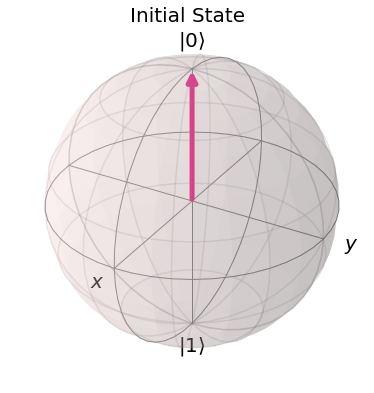

In [12]:
# Plot the initial quantum state |0> on the Bloch sphere
plot_bloch_vector(bloch_vector([1, 0]), title='Initial State')


<a id="task8"></a>
#### Task 8

Apply the braiding operations $\sigma_1$, $\sigma_1^{-1}$, $\sigma_2$ and $\sigma_2^{-1}$ on $\ket{0}$ and plot the final quantum state.

In [ ]:
# Compute sigma_1 |0>

### Your Code

# Plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

Notice that $\sigma_1$ does not affect the Bloch vector of $\ket{0}$ because it is an RZ rotation.

In [ ]:
# compute sigma_1^(-1) |0>

### Your Code

# plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

In [ ]:
# Compute sigma_2 |0>

### Your Code

# Plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

In [ ]:
# Compute sigma_2^(-1) |0>

### Your Code

# Plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task8)

<a id="task9"></a>
#### Task 9

Now, show in the Bloch sphere all possible states that we can obtain by applying two elementary braiding operations ($\sigma_i^p \sigma_j^q$) on the state $\ket{0}$. Here, $|p| + |q| = 2$.

In [ ]:
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = [0, 1, 2]
INITIAL_STATE = np.array([1, 0])

final_states = []
for p in POWER:
    for q in POWER:
        if p + q == 2:
            for sigma_i in SIGMA:
                for sigma_j in SIGMA:
                    
                    #  YOUR CODE

# Plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task9)

<a id="task10"></a>
#### Task 10

Repeat the task 8 for sequences of 3 elementary braiding operations  ($\sigma_i^p \sigma_j^q \sigma_k^r$).

In [ ]:
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = [0, 1, 2, 3]
INITIAL_STATE = np.array([1, 0])

final_states = []
for p in POWER:
    for q in POWER:
        for r in POWER:
            if p + q + r == 3:
                for sigma_i in SIGMA:
                    for sigma_j in SIGMA:
                        for sigma_k in SIGMA:

                            #  YOUR CODE

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task10)

In [13]:
# it is better to use an iterator to avoid excessive nested loops
def iterator(length, n_max):
    vector = []
    final_vector = []
    for ii in range(length):
        vector.append(0)
        final_vector.append(n_max)
    yield vector
    while vector != final_vector:
        for ii, v in enumerate(vector):
            if v == n_max:
                vector[ii] = 0
            else:
                vector[ii] += 1
                break
        yield vector

In [14]:
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = [0, 1, 2, 3]
INITIAL_STATE = np.array([1, 0])

final_states = []
for powers in iterator(3, 3):
    if sum(powers) == 3:
        for sigmas in iterator(3, 3):
            final_state = SIGMA[sigmas[2]]**powers[2] @ SIGMA[sigmas[1]]**powers[1] @ SIGMA[sigmas[0]]**powers[0] @INITIAL_STATE
            final_states.append(final_state)

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

NameError: name 'sigma_1' is not defined

<a id="task11"></a>
#### Task 11

Repeat Task 9 for a sequence of arbitrary number $L$ of the elementary braiding operators. Try $L=4$.

<div class="alert alert-block alert-danger"> 
<b>CAUTION!</b> Be careful of memory crashes!
</div>


In [ ]:
L = 3
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = np.linspace(0, L, L+1)
INITIAL_STATE = np.array([1, 0])


final_states = []
for powers in iterator(L, L):
    if sum(powers) == L:
        for sigmas in iterator(L, 3):
            final_state = INITIAL_STATE
            for ii in range(L):
                final_state = SIGMA[sigmas[ii]]**powers[ii] @ final_state
            final_states.append(final_state)

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

<a id="310"></a>
### 3.1 Conclusion

Notice that if $L$ is big enough, the states obtained by applying braiding combinations on the state $\ket{0}$ can cover all the Bloch sphere. **As a result, we can approximate any single qubit quantum gate by using only Fibonacci elementary braiding operators.**

<hr>

<a id="400"></a>
## 4.  Single Qubit Quantum Gates with Braiding Operations

There are many algorithms that can be used to approximate a given single-qubit quantum gate with a sequence of braiding operations:

1. ##### Brute-force algorithm: [1](#ref1)
We can search numerically all possible combinations of braiding sequences to find the best one that is close enough to a given quantum gate. Since the search space grows exponentially, the brute-force algorithm is exhaustive. However, it can be enhanced by including the properties of braiding operations. Moreover, the result of brute-forcing is optimal.

2. ##### Solovay-Kitaev algorithm: [2](#ref2)
It is an iterative algorithm. It is efficient since it can approximate a given quantum gate with braiding sequence in polylogarithmic time $O(\log^c(1/\epsilon)$ where $\epsilon$ is the approximation error.

3. #### Machine learning algorithms: [3](#ref3) [4](#ref4)

It is based on using one of the machine learning algorithms such as evolutionary algorithm, Markov decision process, deep learning, ...etc.

4. #### Systematic algorithms: [5](#ref5)
For Fibonacci braiding matrices, there exists a systematic algorithm that can approximate some single qubit quantum gates in an exact computable method.

<a id="410"></a>
### 4.1 Properties of Single Qubit Braiding Operations

<a id="411"></a>
#### a. Similarity Relation 

<a id="task12"></a>
##### Task 12
Using the definition of $\sigma_2$, show that $$\sigma_2 = F \sigma_1 F$$

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task12)

<a id="412"></a>
#### b. Yang-Baxter Relation

Yang-Baxter equations are the algebra of braiding operations.

<a id="task13"></a>
##### Task 13

Prove that $$\sigma_1 \sigma_2 \sigma_1 = \sigma_2 \sigma_1 \sigma_2$$

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task13)

<a id="413"></a>
#### c. Braiding Operations as Square Roots of Identity

<a id="task14"></a>
##### Task 14

Prove that $$\sigma_1^{10} = \sigma_2^{10} = I$$ 

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task14)

Hence,

$$\sigma_1^{-1} = \sigma_1^9$$

#### Remarks

We should take care of the algebraic properties of braiding operations when designing algorithms to approximate quantum gates. For instance, the periodicity of braiding operations imposes constraints on the possible values of braiding powers.

<a id="420"></a>
### 4.2 Weaves vs Braids

In a paper by [Simon et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.96.070503), it is proven that we can move only one anyon to approximate arbitrary quantum gates. Braiding with one anyon is called weaving. The benefit of weave sequences is to make the control of anyons **technically easier** in experiment.

In case of 3 Fibonacci anyons, weaves can be constructed by braiding sequences of only $\sigma_1^2$, $\sigma_2^2$ and their inverses. To verify this fact, let's use the Simulator again!

<a id="task15"></a>
##### Task 15

Check that $\sigma_2^2 \sigma_1^4 \sigma_2^{-2} \sigma_1^2   $ is a weaving sequence.


In [ ]:
circuit = AnyonicCircuit()

# Your Code

circuit.draw()

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task15)

In [ ]:
Latex(circuit.history('latex'))

In [ ]:
# To highlight the woven strand, we can use additional arguments as shown below
circuit.drawer.anyons[2].color = "red"
circuit.draw()

Notice that the red strand represents the path of the only moving anyon. Other anyons does not change their positions.

<div class="alert alert-block alert-info"> <b>Hint: </b> For more color options, read this <a href=https://matplotlib.org/stable/gallery/color/named_colors.html>documentation</a>. </div>

<a id="430"></a>
### 4.3 Mini-Project

Choose one of the algorithms mentioned above in [section 4](#400) to find Hadamard and T Gate using your favorite programming language. Try to find the best braiding sequence with length $L=10, 20, 30$.


<a id="440"></a>
### 4.4 Examples
Let's see how Hadamard and T gates are approximated by Fibonacci braiding operations! 

We targeted H and T gates because they can approximate any single qubit quantum gate!

<a id="441"></a>
#### 4.4.1 Example: Hadamard Gate

<a id="task16"></a>
##### Task 16

Create a function that applies a given list of braids on _AnyonicCircuit_.

In [ ]:
import numpy as np
def braid(circuit, braids):
    """
    This function applies the list of braids [[i_1, p_1], [i_2, p_2], ... [i_L, p_L]]
    on a circuit of AnyonSimulator type.
    """
    
    ### Your Code
    

[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task16)

In [ ]:
# Example
braiding_sequence = [[1, 2], [2, 4], [1, -2]]
circuit = AnyonicCircuit()
braid(circuit, braiding_sequence)
Latex(circuit.history("latex"))

<div class="alert alert-block alert-success">
<b>Tip: </b> Use 'AnyonicCircuit.braid_sequence' method to braid given sequences directly.
</div>

<a id="task17"></a>
#### Task 17

Show that the following weaving sequence of length 30 approximates Hadamard gate up to a global phase:

$$H \approx \sigma_1^{-2}\sigma_2^{-2}\sigma_1^{2} \sigma_2^{2} \sigma_1^{-2} \sigma_2^{-4} \sigma_1^{2} \sigma_2^{-2} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{-4}$$

In [ ]:
# Hadamard weaving sequence

### Your Code


[click for our solution](C00_Single_Qubit_Topological_Gates_Solutions.ipynb#task17)

In [ ]:
# Draw Hadamard weaving sequence
hadamard_circuit = AnyonicCircuit()
hadamard_circuit.braid_sequence(hadamard_seq)
hadamard_circuit.draw()

In [ ]:
Latex(hadamard_circuit.history("latex"))

<a id="4411"></a>
#### 4.4.1.1 Distance
Use the following distance function to measure the distance between the braiding sequence and the target Hadamard gate. The distance measures how close is our braiding sequence to the desired quantum gate.

In [ ]:
# distance metric
def distance(w, u):
    """
    This function calculates the Hilbert-Schmidt distance between two unitaries w and u 
    up to a global phase.
    """
    res = w.T.conjugate() @ u
    tr = np.trace(res)
    return 1 - ( 1 / w.shape[0]**2 ) * (tr.conjugate() * tr).real

In [ ]:
I = np.array([[1, 0],
              [0, 1]])
HADAMARD = np.array([[1, 1], 
                     [1, -1]]) / np.sqrt(2)
sigma = {1 : {1 : sigma_1, -1 : sigma_1_inv},
         2 : {1 : sigma_2, -1 : sigma_2_inv}}

L = 0
unitary = I
for weave in hw:
    for ii in range(abs(weave[1])):
        L += 1
        if weave[1] > 0:
            unitary = sigma[weave[0]][1] @ unitary
        else:
            unitary = sigma[weave[0]][-1] @ unitary

print(f'Hadamard = \n\n{HADAMARD}')
print(f'\nBraiding Sequence = \n\n{unitary}')
print(f'\nDistance(Hadamard, Braiding Sequence) = {distance(unitary, HADAMARD)}')

<a id="442"></a>
### 4.4.2 Example: T Gate

<a id="task18"></a>
#### Task 18

Show that the following weaving sequence of length 30 approximates T gate up to a global phase:

$$T \approx \sigma_2^{-2}\sigma_1^{4} \sigma_2^{-2} \sigma_1^{4} \sigma_2^{-2} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{2} \sigma_2^{4} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{2}$$

In [ ]:
# T Gate weaving sequence

### Your Code

In [ ]:
# Draw Hadamard weaving sequence
t_circuit = AnyonicCircuit()
t_circuit.braid_sequence(t_sequence)
t_circuit.draw()

In [ ]:
Latex(t_circuit.history("latex"))

In [ ]:

### Your Code

print(f'length = {L}')
print(f'T = \n\n{TGATE}')
print(f'\nBraiding Sequence = \n\n{unitary}')
print(f'\nDistance(T, Braiding Sequence) = {distance(unitary, TGATE)}')

<hr>
<a id="500"></a>

## 5. More on the Simulator (Optional)

The simulator provides the numerical representation of the braiding matrices. However, it includes the non-computational states too! So, the braiding matrices of 3 Fibonacci anyons in the simulator are in fact 3 dimensional! Don't worry! We are interested only in the 2-dimensional matrix that acts on the computational states.

<a id="510"></a>
### 5.1 Fusion States

In [ ]:
# Get the fusion states of 3 Fibonacci anyons
circuit = AnyonicCircuit()
fusion_states = circuit.basis
print(fusion_states)

We get 3 fusion states : $[1, 0]$, $[0, 1]$ and $[1, 1]$.

1. The fusion state $[1, 0]$ is the **non-computational state** since it has total charge 0.

1. The fusion states $[0, 1]$ and $[1, 1]$ are the **computational states** with total charge 1.

<a id="520"></a>
### 5.1 Braiding matrices

In this section, we are going to visualize the matrix representation of the braiding operations $\sigma_1$, $\sigma_2$ and their inverses.

First of all, let us generate those matrices.

In [ ]:
import numpy as np
from tqsim import AnyonicCircuit, generate_braiding_operator

# Get elementary braiding matrices of 3 anyons

braiding_matrices = []
for index in [1, 2]:
    braiding_matrices.append(generate_braiding_operator(index, 1, 3))

To illustrate the matrices, we use the `cplot` function.

In [ ]:
from tqsim import cplot

<a id="521"></a>
### Visualising $\sigma_1$


In [ ]:
cplot(np.array(braiding_matrices[0])[1::, 1::])

<a id="522"></a>
### Visualising $\sigma_1^{-1}$

In [ ]:
cplot(np.array(braiding_matrices[0])[1::, 1::].T.conjugate())

<a id="523"></a>
### Visualising $\sigma_2$

In [ ]:
cplot(np.array(braiding_matrices[1])[1::, 1::])

<a id="524"></a>
### Visualising $\sigma_2^{-1}$

In [ ]:
cplot(np.array(braiding_matrices[1])[1::, 1::].T.conjugate())

<hr>

<a id="bibliography"></a>
## References

- <a id="ref1"></a> [M T Rouabah et al 2021 J. Phys.: Conf. Ser. 1766 012029](https://iopscience.iop.org/article/10.1088/1742-6596/1766/1/012029)
- <a id="ref2"></a> [C M Dawson & M A Nielsen 2005 arXiv quant-ph 0505030](https://arxiv.org/pdf/quant-ph/0505030.pdf)
- <a id="ref3"></a> [Y H Zhang et al 2020 Phys. Rev. Lett. 125 170501](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.170501)
- <a id="ref4"></a> [M S Alam et al 2019 arXiv 1912.12002](https://arxiv.org/abs/1912.12002)
- <a id="ref5"></a> [V Kliuchnikov et al 2014 Phys. Rev. Lett. 112, 140504](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.112.140504)